In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import matplotlib.pyplot as plt
nltk.download('inaugural')

[nltk_data] Downloading package inaugural to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.


True

# Useful links and resources

* [Everything you need to know about natural language processing](https://blog.algorithmia.com/introduction-natural-language-processing-nlp/)

* NLTK Book here: http://www.nltk.org/nltk_data/

* [Tracking Progress in Natural Language Processing](https://nlpprogress.com):  tracks the progress in Natural Language Processing (NLP), including the datasets and the current state-of-the-art for the most common NLP tasks.

* Some examples in this notebook are from  https://github.com/edbullen/nltk

* Youtube link: [Natural Language Processing (NLP) & Text Mining Tutorial Using NLTK | Edureka](https://www.youtube.com/watch?v=05ONoGfmKvA)


# NLTK Corpora and Treebanks

In the field of Natural Langugage Processing, a sample of real world text is referred to as a *Corpus* (plural *Corpora*).

Possibly the most famous and widely used corpus is the **Brown Corpus** (https://en.wikipedia.org/wiki/Brown_Corpus) which was the first million-word electronic corpus of English, created in 1961 at Brown University.

A *Treebank* is a parsed and annotated Corpus that records the syntactic or semantic sentence structure of the content (i.e. typically each sentence and probably each word in the corpus).   The first large-scale treebank was The **Penn Treebank**, created in 1992 at the University of Pennsylvania. 

There are many corpora and treebanks distributed with the NLTK toolkit, listed in the NLTK Book here: http://www.nltk.org/nltk_data/

Various methods can be applied against a loaded corpus to perform actions such as extract the words from corpus, identify the files that make up a corpus, list category definitions in a corpus and extract text filtered by category.

A list of common methods is provided in Chapter 2 of the [NLTK Book](http://www.nltk.org/book/ch02.html) as follows:  
<table align="left">
<tr><td><b>Example</b></td>   <td align="left"><b>Description</b></td></tr>
<tr><td>fileids()</td>   <td align="left">the files of the corpus</td></tr>
<tr><td>fileids([categories])</td>   <td align="left">the files of the corpus corresponding to these categories</td></tr>
<tr><td>categories()</td>   <td align="left">the categories of the corpus</td></tr>
<tr><td>categories([fileids])</td>   <td align="left">the categories of the corpus corresponding to these files</td></tr>
<tr><td>raw()</td>   <td align="left">the raw content of the corpus</td></tr>
<tr><td>raw(fileids=[f1,f2,f3])</td>   <td align="left">the raw content of the specified files</td></tr>
<tr><td>raw(categories=[c1,c2])</td>   <td align="left">the raw content of the specified categories</td></tr>
<tr><td>words()</td>   <td align="left">the words of the whole corpus</td></tr>
<tr><td>words(fileids=[f1,f2,f3])</td>   <td align="left">the words of the specified fileids</td></tr>
<tr><td>words(categories=[c1,c2])</td>   <td align="left">the words of the specified categories</td></tr>
<tr><td>sents()</td>   <td align="left">the sentences of the whole corpus</td></tr>
<tr><td>sents(fileids=[f1,f2,f3])</td>   <td align="left">the sentences of the specified fileids</td></tr>
<tr><td>sents(categories=[c1,c2])</td>   <td align="left">the sentences of the specified categories</td></tr>
<tr><td>abspath(fileid)</td>   <td align="left">the location of the given file on disk</td></tr>
<tr><td>encoding(fileid)</td>   <td align="left">the encoding of the file (if known)</td></tr>
<tr><td>open(fileid)</td>   <td align="left">open a stream for reading the given corpus file</td></tr>
<tr><td>root</td>   <td align="left">if the path to the root of locally installed corpus</td></tr>
<tr><td>readme()</td>   <td align="left">the contents of the README file of the corpus</td></tr>
</table>

In [11]:
from nltk.corpus import inaugural
print(inaugural.fileids())

['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1805-Jefferson.txt', '1809-Madison.txt', '1813-Madison.txt', '1817-Monroe.txt', '1821-Monroe.txt', '1825-Adams.txt', '1829-Jackson.txt', '1833-Jackson.txt', '1837-VanBuren.txt', '1841-Harrison.txt', '1845-Polk.txt', '1849-Taylor.txt', '1853-Pierce.txt', '1857-Buchanan.txt', '1861-Lincoln.txt', '1865-Lincoln.txt', '1869-Grant.txt', '1873-Grant.txt', '1877-Hayes.txt', '1881-Garfield.txt', '1885-Cleveland.txt', '1889-Harrison.txt', '1893-Cleveland.txt', '1897-McKinley.txt', '1901-McKinley.txt', '1905-Roosevelt.txt', '1909-Taft.txt', '1913-Wilson.txt', '1917-Wilson.txt', '1921-Harding.txt', '1925-Coolidge.txt', '1929-Hoover.txt', '1933-Roosevelt.txt', '1937-Roosevelt.txt', '1941-Roosevelt.txt', '1945-Roosevelt.txt', '1949-Truman.txt', '1953-Eisenhower.txt', '1957-Eisenhower.txt', '1961-Kennedy.txt', '1965-Johnson.txt', '1969-Nixon.txt', '1973-Nixon.txt', '1977-Carter.txt', '1981-Reagan.txt', '1985-Reaga

In [12]:
years = [fileid[:4] for fileid in inaugural.fileids()] # get the first 4 characters of the fileid
print(years[0], years[-1])

1789 2009


In [13]:
len(inaugural.words('1789-Washington.txt'))

1538

In [14]:
len(inaugural.sents('1789-Washington.txt'))

24

In [15]:
print(len(inaugural.words('2009-Obama.txt')))
print(len(inaugural.sents('2009-Obama.txt')))

2726
112


In [16]:
len(inaugural.words())

145735

In [17]:
# How does the frequency of the use of some words changes
# example from https://stackoverflow.com/questions/51414876/python-nltk-inaugural-text-corpora-hands-on-solution-needed
cfd = nltk.ConditionalFreqDist(
    [(fileid[:4], target) 
     for fileid in inaugural.fileids() 
     for w in inaugural.words(fileid) 
     for target in ['america', 'citizen'] 
     if w.lower().startswith(target)])

cfd.tabulate(conditions=['1841', '1993', '2009'], 
             samples=['america', 'citizen'])

     america citizen 
1841       7      38 
1993      33       2 
2009      15       2 


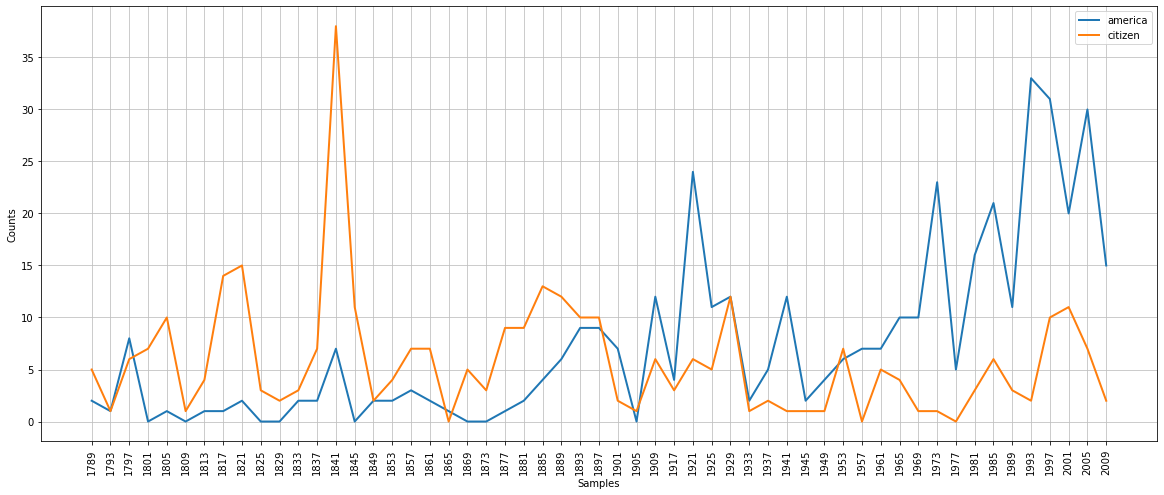

In [18]:
# example from https://www.nltk.org/book/ch02.html
cfd = nltk.ConditionalFreqDist(
    [(target, fileid[:4]) 
     for fileid in inaugural.fileids() 
     for w in inaugural.words(fileid) 
     for target in ['america', 'citizen'] 
     if w.lower().startswith(target)])

plt.figure(figsize=(20,8))
cfd.plot()

### Tokenizing

In [19]:
input_str = "NLTK is a leading platform for building Python programs to work with human language data."
tokens = word_tokenize(input_str)
print(tokens)

['NLTK', 'is', 'a', 'leading', 'platform', 'for', 'building', 'Python', 'programs', 'to', 'work', 'with', 'human', 'language', 'data', '.']


In [20]:
text = "Natural language processing (NLP) is a field " + \
       "of computer science, artificial intelligence " + \
       "and computational linguistics concerned with " + \
       "the interactions between computers and human " + \
       "(natural) languages, and, in particular, " + \
       "concerned with programming computers to " + \
       "fruitfully process large natural language " + \
       "corpora. Challenges in natural language " + \
       "processing frequently involve natural " + \
       "language understanding, natural language" + \
       "generation frequently from formal, machine" + \
       "-readable logical forms), connecting language " + \
       "and machine perception, managing human-" + \
       "computer dialog systems, or some combination " + \
       "thereof."
text_sent = sent_tokenize(text)
text_tokens = word_tokenize(text)
print(text_sent) 
print(text_tokens)

['Natural language processing (NLP) is a field of computer science, artificial intelligence and computational linguistics concerned with the interactions between computers and human (natural) languages, and, in particular, concerned with programming computers to fruitfully process large natural language corpora.', 'Challenges in natural language processing frequently involve natural language understanding, natural languagegeneration frequently from formal, machine-readable logical forms), connecting language and machine perception, managing human-computer dialog systems, or some combination thereof.']
['Natural', 'language', 'processing', '(', 'NLP', ')', 'is', 'a', 'field', 'of', 'computer', 'science', ',', 'artificial', 'intelligence', 'and', 'computational', 'linguistics', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', '(', 'natural', ')', 'languages', ',', 'and', ',', 'in', 'particular', ',', 'concerned', 'with', 'programming', 'computers', 'to'

In [21]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'and', 'am', "couldn't", "doesn't", 'hadn', 'been', "shouldn't", 'own', 'herself', 'haven', 'we', 'again', 'mustn', 'd', 'she', 'but', 'once', 'ourselves', 'my', 'the', 'out', 'is', 'a', 'did', 'aren', 'itself', 'very', 'nor', 'in', 'couldn', 'what', 'their', "that'll", 'about', 'then', 'off', 'more', 'doing', 'if', 'at', 'some', "she's", 'all', 'can', 'most', 'while', 'll', 'should', 'only', 'him', 'hasn', 'who', 'them', 'same', 'yourself', 'was', 'an', 'or', 'were', "isn't", 'on', 'that', 'won', 'there', 'when', "mightn't", 'whom', 'they', "didn't", 'have', "mustn't", 's', 'being', 'ma', 'are', 'himself', 'ours', 'don', "you'll", "should've", 'before', 'up', 'm', 'where', 'into', "it's", "aren't", 'me', 'it', "hadn't", "you're", 'yours', 'this', 'didn', 'i', 'her', 'will', 'do', 'myself', 'any', 'shouldn', 'you', 't', 'for', 'so', 'just', 'such', 'no', 'down', "you've", 'wasn', 'those', 'y', 'to', 'each', 'has', 'during', 'after', 'than', 'now', 'few', 'further', 'between', 'below',

In [22]:
print(input_str)

result = [i for i in tokens if not i in stop_words]
print(result)

NLTK is a leading platform for building Python programs to work with human language data.
['NLTK', 'leading', 'platform', 'building', 'Python', 'programs', 'work', 'human', 'language', 'data', '.']


In [23]:
#from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

### Stemming

In [24]:
from nltk.stem import PorterStemmer

In [25]:
stemmer = PorterStemmer()
text_stem = []
for token in text_tokens:
    text_stem.append(stemmer.stem(token))
#     print(stemmer.stem(token))
print(text_stem)

['natur', 'languag', 'process', '(', 'nlp', ')', 'is', 'a', 'field', 'of', 'comput', 'scienc', ',', 'artifici', 'intellig', 'and', 'comput', 'linguist', 'concern', 'with', 'the', 'interact', 'between', 'comput', 'and', 'human', '(', 'natur', ')', 'languag', ',', 'and', ',', 'in', 'particular', ',', 'concern', 'with', 'program', 'comput', 'to', 'fruit', 'process', 'larg', 'natur', 'languag', 'corpora', '.', 'challeng', 'in', 'natur', 'languag', 'process', 'frequent', 'involv', 'natur', 'languag', 'understand', ',', 'natur', 'languagegener', 'frequent', 'from', 'formal', ',', 'machine-read', 'logic', 'form', ')', ',', 'connect', 'languag', 'and', 'machin', 'percept', ',', 'manag', 'human-comput', 'dialog', 'system', ',', 'or', 'some', 'combin', 'thereof', '.']


### Synonyms and Antonyms

In [26]:
# The result doesn't match what's here: 
# https://www.tutorialspoint.com/python/python_synonyms_and_antonyms.htm

from nltk.corpus import wordnet

synonyms = []

for syn in wordnet.synsets("Soil"):
    for lm in syn.lemmas():
             synonyms.append(lm.name())
print (set(synonyms))

LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - '/home/jovyan/nltk_data'
    - '/opt/conda/nltk_data'
    - '/opt/conda/share/nltk_data'
    - '/opt/conda/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
antonyms = []

for syn in wordnet.synsets("ahead"):
    for lm in syn.lemmas():
        if lm.antonyms():
            antonyms.append(lm.antonyms()[0].name())

print(set(antonyms))

### Movie reviews

In [31]:
# Lets See how the movies are classified
# https://www.tutorialspoint.com/python/python_text_classification.htm
from nltk.corpus import movie_reviews
nltk.download('movie_reviews')
movie_reviews.categories()

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


['neg', 'pos']

In [32]:
fields = movie_reviews.fileids()
#print(fields)
fields[0:5]

['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt',
 'neg/cv004_12641.txt']

In [33]:
#movie_reviews.raw("neg/cv000_29416.txt")

In [34]:
all_words = []
for w in movie_reviews.words():
    all_words.append(w.lower())

In [35]:
all_words[0:10]

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party']

In [36]:
len(all_words)

1583820

In [37]:
fdist = nltk.FreqDist(all_words) # get the frequency distribution

In [38]:
# Total number of samples
fdist.N()

1583820

In [39]:
# Get a word's frequency
print (fdist.freq('teen'))
print (fdist.freq('looooot'))

9.533911681883042e-05
6.313848795949034e-07


In [40]:
# https://en.wikipedia.org/wiki/Hapax_legomenon
# In corpus linguistics, a hapax legomenon 
# sometimes abbreviated to hapax is a word that occurs only once 
# within a context, either in the written record of an entire language, 
# in the works of an author, or in a single text.

fdist.hapaxes()[0:10]

['looooot',
 'schnazzy',
 'timex',
 'indiglo',
 'jessalyn',
 'gilsig',
 'ruber',
 'jaleel',
 'balki',
 'wavers']

In [41]:
print(fdist.most_common(10))

[(',', 77717), ('the', 76529), ('.', 65876), ('a', 38106), ('and', 35576), ('of', 34123), ('to', 31937), ("'", 30585), ('is', 25195), ('in', 21822)]


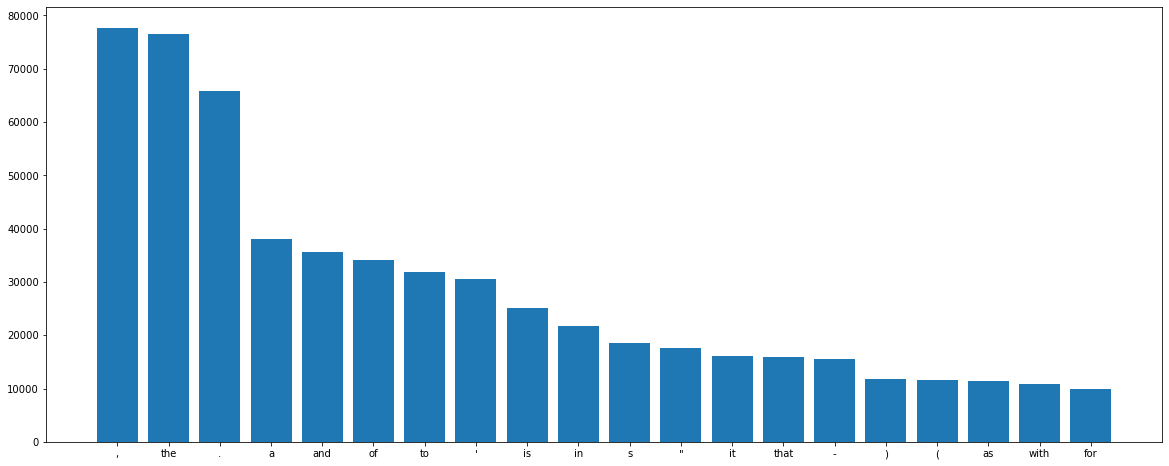

In [42]:
# # Draw a bar chart with the count of the most common words
# import matplotlib.pyplot as plt
x, y = zip(*fdist.most_common(n=20)) # Unzip the tuples into lists
plt.figure(figsize=(20,8))
plt.bar(range(len(x)), y)
plt.xticks(range(len(x)), x)
plt.show()

In [ ]:
all_words_clean = [i for i in all_words if not i in stop_words]
fdist_clean = nltk.FreqDist(all_words_clean) # get the frequency distribution
print(fdist_clean.most_common(10))

In [ ]:
# # Draw a bar chart with the count of the most common words
import matplotlib.pyplot as plt
x, y = zip(*fdist_clean.most_common(n=20)) # Unzip the tuples into lists
plt.figure(figsize=(20,8))
plt.bar(range(len(x)), y)
plt.xticks(range(len(x)), x)
plt.show()

In [ ]:
import string
string.punctuation

In [ ]:
all_words_clean2 = [i for i in all_words_clean if not i in string.punctuation]
fdist_clean2 = nltk.FreqDist(all_words_clean2) # get the frequency distribution
print(fdist_clean2.most_common(10))

In [ ]:
#from nltk.corpus import wordnet
synonyms = []

for syn in wordnet.synsets("film"):
    for lm in syn.lemmas():
             synonyms.append(lm.name())
print (set(synonyms))

In [ ]:
# Draw a bar chart with the count of the most common words
import matplotlib.pyplot as plt
font = {'family' : 'normal',
        'weight' : 'regular',
        'size'   : 22}
plt.rc('font', **font)

x, y = zip(*fdist_clean2.most_common(n=15)) # Unzip the tuples into lists
plt.figure(figsize=(20,8))
plt.bar(range(len(x)), y)
plt.xticks(range(len(x)), x)
plt.show()

### News processing

In [ ]:
from nltk import Text
from nltk.corpus import reuters
 
text = Text(reuters.words())
# via https://nlpforhackers.io/introduction-nltk/

In [ ]:
# Extract a specific category

# Example from https://towardsdatascience.com/@badreeshshetty
# Get the trade words
tradeWords = reuters.words(categories = 'trade')
len(tradeWords)

In [ ]:
# Remove stop words and punctuation
# This takes a couple of minutes to run
tradeWords = [w for w in tradeWords if w.lower() not in stopwords.words('english') ]

In [ ]:
tradeWords = [w for w in tradeWords if w not in string.punctuation]
punctCombo = [c+"\"" for c in string.punctuation ]+ ["\""+c for c in string.punctuation ]
tradeWords = [w for w in tradeWords if w not in punctCombo]
len(tradeWords)

In [ ]:
fdist = nltk.FreqDist(tradeWords)
fdist.plot(20, cumulative=False)

In [ ]:
for word, frequency in fdist.most_common(10):
    print(word, frequency)

## Bi-Grams

In [ ]:
biTradeWords = nltk.bigrams(tradeWords)
biFdist = nltk.FreqDist(biTradeWords)
biFdist.most_common(10)

In [ ]:
biFdist.plot(20, cumulative=False)

In [ ]:
# Get words that appear in similar contexts
text.similar('Monday', 5) 
# april march friday february january
 

In [ ]:
# Get common contexts for a list of words
text.common_contexts(['August', 'June']) 
# since_a in_because last_when between_and last_that and_at ...


In [ ]:

# Get contexts for a word
text.concordance('Monday')
# said . Trade Minister Saleh said on Monday that Indonesia , as the world ' s s
# Reuters to clarify his statement on Monday in which he said the pact should be
#  the 11 - member CPA which began on Monday . They said producers agreed that c
# ief Burkhard Junger was arrested on Monday on suspicion of embezzlement and of
# ween one and 1 . 25 billion dlrs on Monday and Tuesday . The spokesman said Mo
# ay and Tuesday . The spokesman said Monday ' s float included 500 mln dlrs in 
 

# LSA
Latent Semantic Analysis (LSA) is a theory and method for extracting and representing the contextual-usage meaning of words by statistical computations applied to a large corpus of text.

LSA is an information retrieval technique which analyzes and identifies the pattern in unstructured collection of text and the relationship between them.

LSA is an unsupervised way of uncovering synonyms in a collection of documents.

# LDA
In natural language processing, latent Dirichlet allocation (LDA) is a generative statistical model that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar. For example, if observations are words collected into documents, it posits that each document is a mixture of a small number of topics and that each word's presence is attributable to one of the document's topics. LDA is an example of a topic model.

# TF-IDF
TFIDF is an information retrieval technique that weighs a term's frequency (TF) and its inverse document frequency (IDF). Each word has its respective TF and IDF score. The product of the TF and IDF scores of a word is called the TFIDF weight of that word.

Put simply, the higher the TFIDF score (weight), the rarer the word and vice versa.